In [51]:
# Transform the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

original_x = [0, 7, 12, 15, 17, 20, 24, 30]
original_y = [5.3, 5.2, 5.4, 5.1, 5.3, 5.2, 5.1, 5.2]

x = pd.DataFrame(original_x)
y = pd.DataFrame(original_y)

In [ ]:
# Get the polynomial curve of degree 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = polynomial_features.fit_transform(x)

linear_regression = LinearRegression()
linear_regression.fit(x_poly, y)
intercept, coefficient = linear_regression.intercept_, linear_regression.coef_[0]

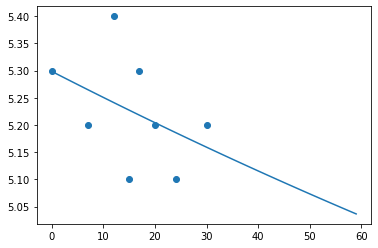

In [88]:
# Represent the curve alongside the datapoints
x_axis_representation = np.arange(0, 60)

polynomial_function = intercept[0]
for index, single_coefficient in enumerate(coefficient):
  polynomial_function += single_coefficient * (x_axis_representation ** (index + 1))

plt.plot(x_axis_representation, polynomial_function)
plt.scatter(original_x, original_y)

In [100]:
# Create usable function
def get_polynomial_function(pace_each_day, specific_days, degree):

  # Transform data
  x = pd.DataFrame(specific_days)
  y = pd.DataFrame(pace_each_day)

  # Prepare and set hyperparameters
  polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
  x_poly = polynomial_features.fit_transform(x)

  # Train model
  linear_regression = LinearRegression()
  linear_regression.fit(x_poly, y)
  intercept, coefficients = linear_regression.intercept_[0], linear_regression.coef_[0]

  return intercept, coefficients

def visualize_function(intercept, coefficients, pace_each_day, days_ran, number_of_future_days):
  x_axis_representation = np.arange(0, number_of_future_days)
  
  polynomial_function = intercept
  for index, single_coefficient in enumerate(coefficients):
    polynomial_function += single_coefficient * (x_axis_representation ** (index + 1))
  
  plt.plot(x_axis_representation, polynomial_function)
  plt.scatter(days_ran, pace_each_day)

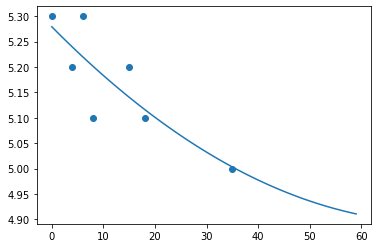

In [114]:
# Use functions
pace_min_per_km = [5.3, 5.2, 5.3, 5.1, 5.2, 5.1, 5.0]
days_ran = [0, 4, 6, 8, 15, 18, 35]

intercept, coefficients = get_polynomial_function(pace_min_per_km, days_ran, 2) # For the 60 days range, degree=2 seems to have realistic results
visualize_function(intercept, coefficients, pace_min_per_km, days_ran, 120)